# readme
descrip: plot Boston, New York SSH and AMOC Time Series for Sunway LR and HR (transient (TR) and control (CN))<br>

update history: <br>
v1.0 DL 2021Feb06 <br>
v1.1 DL 2021Mar03 <br>
v1.2 DL 2021Apr24 <br>
v1.3 DL 2021May06 make publication-ready pics <br>
v1.4 DL 2021Jun02 add TR minus CN plots <br>

extra notes: <br>
Fig 2 of the paper<br>
I used xoak to select cities from POP grids following https://pop-tools.readthedocs.io/en/latest/examples/xoak-example.html <br>
There is memory issue if use large data set files with xoak. I first use xoak with t12 and g16 grid files to get index for cities then select index for large data set files. 

# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import cartopy
# import cartopy.crs as ccrs
# cartopy.config['pre_existing_data_dir']='/ihesp/shared/cartopy_features'
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xoak
# import xesmf as xe

# dask jupyter lab packages
from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

# incorporate dask 

In [2]:
client = Client("tcp://10.73.2.194:37229")
client

Client Scheduler: tcp://10.73.2.6:37302 Dashboard: http://10.73.2.6:8787/status,Cluster Workers: 10 Cores: 10 Memory: 210.00 GB


# define parameters

In [3]:
chunks_HR = {'nlat':400,'nlon':300}
chunks_LR = {'nlat':384,'nlon':320}

# === AMOC files ===
indir = '/ihesp/archive/Sunway_Runs/'
# --- TH (transient HR), CH (control HR) ---
infile_MOC_CH=indir+'HR_PI_CTRL/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.MOC.002101.050112.nc'
infile_MOC_TH=indir+'HR_HF_TNST/B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.MOC.185001.210012.nc'
# infile_MHT_HR = '/ihesp/shared/HR_OMIP2-CMIP6/g.e20.G.TL319_t13.control.001.pop.h.012301-018312.N_HEAT.nc' # Meridional Heat Transport
# -----------------------------------------

# --- TL (transient LR), CL (control LR) ---
infile_MOC_TL=indir+'LR_HF_TNST/B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.MOC.185001.210012.nc'
infile_MOC_CL=indir+'LR_PI_CTRL/B.E.13.B1850C5.ne30g16.sehires38.003.sunway.pop.h.MOC.000101.050012.nc'
# ------------------------------------------
# ==================

# === POP grids files ===
infile0_g16 = ('/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
'POPgrids_gx1v6_2020Jun29.nc') # POP g16 grid file
infile0_t12 = ('/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
'POPgrids_tx0.1v2_2020Jun29.nc') # POP t12 grid file
# =======================

outdir='/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/pics/'
pic1 = outdir + 'SSHAMOCTimeSeriesSunwayTRCN_2021Jun02.png'

# read data files
read MOC files

In [4]:
ds_MOC_TL = xr.open_dataset(infile_MOC_TL)
time_s_TL = ds_MOC_TL.time.to_pandas().index.shift(-1,'M')  # convert FOSI time (model year) to actual year
ds_MOC_TL = ds_MOC_TL.assign_coords(time=time_s_TL)
ds_MOC_TL

<xarray.Dataset>
Dimensions:         (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, time: 3012, transport_reg: 2)
Coordinates:
  * time            (time) object 1850-01-31 00:00:00 ... 2100-12-31 00:00:00
  * lat_aux_grid    (lat_aux_grid) float32 -79.49 -78.95 -78.42 ... 89.47 90.0
  * moc_z           (moc_z) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05 5.5e+05
Dimensions without coordinates: d2, moc_comp, transport_reg
Data variables:
    time_bound      (time, d2) object ...
    moc_components  (moc_comp) |S256 ...
    MOC             (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 ...
Attributes:
    title:         B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:       none
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-04-11 at 22:22:40.9
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  750
    tavg_sum:      2592000.0

In [5]:
ds_MOC_CL = xr.open_dataset(infile_MOC_CL)
print(ds_MOC_CL.time)
# 250-->1850, 500-->2100
# 1-->1601, # 1850-(250-1)=1601
time_MOC_CL = xr.cftime_range(start="1601-01", end="2101-01", freq='M', calendar='noleap')
ds_MOC_CL = ds_MOC_CL.assign_coords(time=time_MOC_CL)
ds_MOC_CL

<xarray.DataArray 'time' (time: 6000)>
array([cftime.DatetimeNoLeap(1, 2, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1, 3, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1, 4, 1, 0, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(500, 11, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(500, 12, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(501, 1, 1, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 0001-02-01 00:00:00 ... 0501-01-01 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bound


<xarray.Dataset>
Dimensions:         (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nchar: 256, time: 6000, transport_reg: 2)
Coordinates:
  * time            (time) object 1601-01-31 00:00:00 ... 2100-12-31 00:00:00
  * lat_aux_grid    (lat_aux_grid) float32 -79.49 -78.95 -78.42 ... 89.47 90.0
  * moc_z           (moc_z) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05 5.5e+05
Dimensions without coordinates: d2, moc_comp, nchar, transport_reg
Data variables:
    time_bound      (time, d2) object ...
    moc_components  (moc_comp, nchar) |S1 ...
    MOC             (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 ...
Attributes:
    title:           B.E.13.B1850C5.ne30g16.sehires38.003.sunway
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2020-03-12 at 12:53:17.5
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    750
    tavg_sum:        2592000.0
    tavg_sum_qflux:  2592000.0

In [6]:
ds_MOC_TH = xr.open_dataset(infile_MOC_TH)
time_s_TH = ds_MOC_TH.time.to_pandas().index.shift(-1,'M') # shift 1 mon
ds_MOC_TH = ds_MOC_TH.assign_coords(time=time_s_TH)
ds_MOC_TH

<xarray.Dataset>
Dimensions:            (lat_aux_grid: 395, moc_comp: 1, moc_z: 63, time: 3012, transport_reg: 2)
Coordinates:
  * time               (time) object 1850-01-31 00:00:00 ... 2100-12-31 00:00:00
    transport_regions  (transport_reg) |S256 ...
    moc_components     (moc_comp) |S256 ...
  * moc_z              (moc_z) float32 0.0 1e+03 2e+03 ... 5.75e+05 6e+05
  * lat_aux_grid       (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
Dimensions without coordinates: moc_comp, transport_reg
Data variables:
    MOC                (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 ...

In [7]:
ds_MOC_CH = xr.open_dataset(infile_MOC_CH)
print(ds_MOC_CH.time)
# 250-->1850, 500-->2100
# 1-->1601, # 1850-(250-1)=1601
# 21-->1621,  501-->2101, 1850-(250-21)=1621
time_MOC_CH = xr.cftime_range(start="1621-01", end="2102-01", freq='M', calendar='noleap') 
ds_MOC_CH = ds_MOC_CH.assign_coords(time=time_MOC_CH)
ds_MOC_CH

<xarray.DataArray 'time' (time: 5772)>
array([cftime.DatetimeNoLeap(21, 2, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(21, 3, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(21, 4, 1, 0, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(501, 11, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(501, 12, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(502, 1, 1, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 0021-02-01 00:00:00 ... 0502-01-01 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bound


<xarray.Dataset>
Dimensions:            (lat_aux_grid: 395, moc_comp: 1, moc_z: 63, time: 5772, transport_reg: 2)
Coordinates:
  * time               (time) object 1621-01-31 00:00:00 ... 2101-12-31 00:00:00
    transport_regions  (transport_reg) |S256 ...
    moc_components     (moc_comp) |S256 ...
  * moc_z              (moc_z) float32 0.0 1e+03 2e+03 ... 5.75e+05 6e+05
  * lat_aux_grid       (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
Dimensions without coordinates: moc_comp, transport_reg
Data variables:
    MOC                (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 ...

read SSH files

In [8]:
infile1_ssh_TH = ('/ihesp/archive/Sunway_Runs/HR_HF_TNST/'
              'B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.SSH.185001.210012.nc')
ds_ssh_TH = xr.open_dataset(infile1_ssh_TH, chunks=chunks_HR)
ds_ssh_TH

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 2400, nlon: 3600, time: 3012)
Coordinates:
  * time        (time) object 1850-02-01 00:00:00 ... 2100-12-17 00:00:00
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(3012, 2), meta=np.ndarray>
    SSH         (time, nlat, nlon) float32 dask.array<chunksize=(3012, 400, 300), meta=np.ndarray>
Attributes:
    title:           B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2019-10-29 at 17:54:15.4
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    19331
    tavg_sum:        2676600.0
    tavg_sum_qflux:  2676600.0
    NCO:             netCDF Operators version 4.9.1 (Homepage = http://nco.sf...

In [9]:
infile1_ssh_CH = ('/ihesp/archive/Sunway_Runs/HR_PI_CTRL/'
'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.SSH.0021.0501.nc')
ds_ssh_CH_raw = xr.open_dataset(infile1_ssh_CH, chunks=chunks_HR)
print(ds_ssh_CH_raw.time)
# 250-->1850, 500-->2100
# 21-->1621,  501-->2101, 1850-(250-21)=1621
time_ssh_CH = xr.cftime_range(start="1621", end="2102", freq='Y', calendar='noleap') 
# 2102 is not included, 2101 is the last year
ds_ssh_CH = ds_ssh_CH_raw.assign_coords(time=time_ssh_CH)
ds_ssh_CH

<xarray.DataArray 'time' (time: 481)>
array([cftime.DatetimeNoLeap(21, 7, 16, 22, 0, 0, 0),
       cftime.DatetimeNoLeap(22, 7, 16, 22, 0, 0, 0),
       cftime.DatetimeNoLeap(23, 7, 16, 22, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(499, 7, 2, 5, 0, 0, 0),
       cftime.DatetimeNoLeap(500, 7, 2, 5, 0, 0, 0),
       cftime.DatetimeNoLeap(501, 7, 2, 5, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 0021-07-16 22:00:00 ... 0501-07-02 05:00:00
Attributes:
    long_name:     time
    bounds:        time_bound
    cell_methods:  time: mean


<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 2400, nlon: 3600, time: 481)
Coordinates:
  * time        (time) object 1621-12-31 00:00:00 ... 2101-12-31 00:00:00
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(481, 2), meta=np.ndarray>
    SSH         (time, nlat, nlon) float32 dask.array<chunksize=(481, 400, 300), meta=np.ndarray>
Attributes:
    title:         B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2019-05-27 at 10:36:42.5
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  19331
    tavg_sum:      2676600.0
    history:       Thu May 21 22:18:12 2020: ncra -F -d time,1,12 B.E.13.B185...
    NCO:           netCDF Operators version 4.7.9 (Homepage = http://nco.sf.n...

In [10]:
infile1_ssh_TL = ('/ihesp/archive/Sunway_Runs/LR_HF_TNST/'
              'B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.SSH.185001.210012.nc')
ds_ssh_TL = xr.open_dataset(infile1_ssh_TL,chunks=chunks_LR)
ds_ssh_TL

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 384, nlon: 320, time: 3012)
Coordinates:
  * time        (time) object 1850-01-17 12:00:00 ... 2100-12-17 00:00:00
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(3012, 2), meta=np.ndarray>
    SSH         (time, nlat, nlon) float32 dask.array<chunksize=(3012, 384, 320), meta=np.ndarray>
Attributes: (12/13)
    title:           B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:         Thu May 14 01:43:04 2020: ncra -O -v SSH /home/export/on...
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    ...              ...
    start_time:      This dataset was created on 2020-04-11 at 22:12:21.5
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    25
    tavg_sum:        86400.0
    tavg_sum_qflux:  86400.0
    NCO:             netCDF Operators version 4.9.1 (Homepage = http://nco.sf...

In [11]:
infile1_ssh_CL = ('/ihesp/archive/Sunway_Runs/LR_PI_CTRL/'
              'B.E.13.B1850C5.ne30g16.sehires38.003.sunway.pop.h.SSH.000101.050012.nc')
ds_ssh_CL_raw = xr.open_dataset(infile1_ssh_CL,chunks=chunks_LR)
print(ds_ssh_CL_raw.time)
# 250-->1850, 500-->2100
# 1-->1601, # 1850-(250-1)=1601
time_ssh_CL = xr.cftime_range(start="1601-01", end="2101-01", freq='M', calendar='noleap')
# 2101-01 is not included, the last time is 2100-12
ds_ssh_CL = ds_ssh_CL_raw.assign_coords(time=time_ssh_CL)
ds_ssh_CL

<xarray.DataArray 'time' (time: 6000)>
array([cftime.DatetimeNoLeap(1, 2, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1, 3, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1, 4, 1, 0, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(500, 10, 17, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(500, 11, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(500, 12, 17, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 0001-02-01 00:00:00 ... 0500-12-17 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bound


<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 384, nlon: 320, time: 6000)
Coordinates:
  * time        (time) object 1601-01-31 00:00:00 ... 2100-12-31 00:00:00
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(6000, 2), meta=np.ndarray>
    SSH         (time, nlat, nlon) float32 dask.array<chunksize=(6000, 384, 320), meta=np.ndarray>
Attributes:
    title:           B.E.13.B1850C5.ne30g16.sehires38.003.sunway
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2020-03-12 at 12:53:17.5
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    750
    tavg_sum:        2592000.0
    tavg_sum_qflux:  2592000.0

In [12]:
indir = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
         'data_after_manipulation/RegionalStericHeight/test_2021Apr20/')
# HH: (transient) historic HR
case_HH = 'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway'
infiles_HH=[(indir + case_HH + '/' + case_HH + '.pop.h._RegionalStericHeight_1850-1949_2021Apr24.nc'),
            (indir + case_HH + '/' + case_HH + '.pop.h._RegionalStericHeight_1950-2005_2021Apr24.nc')]
# RH: (transient) RCP8.5 HR
case_RH = 'B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF'
infiles_RH = [indir + case_RH + '/cmpr_' + case_RH + '.pop.h.RegionalStericHeight_'+ str(iyr) + 'av_2021Apr15.nc' 
               for iyr in np.arange(2006,2079+1)]
infiles_sp_RH = indir + case_RH + '/' + case_RH + '.pop.h._RegionalStericHeight_2080-2100_2021Apr24.nc'
infiles_RH.append(infiles_sp_RH)

infiles_TH = infiles_HH + infiles_RH
# infiles_TH
ds_TH = xr.open_mfdataset(infiles_TH, compat="override", combine="by_coords", data_vars="minimal",
                          coords="minimal", chunks=chunks_HR, parallel=True)
ds_TH

<xarray.Dataset>
Dimensions:  (nlat: 2400, nlon: 3600, time: 251)
Coordinates:
  * time     (time) object 1850-12-31 00:00:00 ... 2100-12-31 00:00:00
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(100, 400, 300), meta=np.ndarray>

In [13]:
case_CH = 'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02'
infiles_CH = [indir + case_CH + '/' + case_CH + '.pop.h.0RegionalStericHeight_'+ str(iyr) + 'av_2021Apr15.nc' 
               for iyr in np.arange(250,299+1)]
infiles_sp_CH=[(indir + case_CH + '/' + case_CH + '.pop.h.0_RegionalStericHeight_300-399_2021Apr24.nc'),
            (indir + case_CH + '/' + case_CH + '.pop.h.0_RegionalStericHeight_400-500_2021Apr24.nc')]
# infiles_sp
infiles_CH.extend(infiles_sp_CH)
ds_CH = xr.open_mfdataset(infiles_CH, compat="override", combine="by_coords", data_vars="minimal",
                          coords="minimal", chunks=chunks_HR, parallel=True)
ds_CH

<xarray.Dataset>
Dimensions:  (nlat: 2400, nlon: 3600, time: 251)
Coordinates:
  * time     (time) object 0250-12-31 00:00:00 ... 0500-12-31 00:00:00
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(1, 400, 300), meta=np.ndarray>

In [14]:
# transient (Historic) LR (HL)
indir_HL = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
'data_after_manipulation/RegionalStericHeight/test/B.E.13.BHISTC5.ne30g16.sehires38.003.sunway/')
prefix_HL = 'B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.RegionalStericHeight_'
infiles_HL = [indir_HL + prefix_HL + str(iyr) + 'av_2021Apr14.nc' 
               for iyr in np.arange(1850,2005+1)]

# transient (RCP85) LR (RL)
indir_RL = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
'data_after_manipulation/RegionalStericHeight/test/B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway.CN_OFF/')
prefix_RL = 'B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway.CN_OFF.pop.h.RegionalStericHeight_'
infiles_RL1 = [indir_RL + prefix_RL + str(iyr) + 'av_2021Apr14.nc' 
               for iyr in np.arange(2006,2013+1)] # no 2014 yr due to missing 2014-01 nc file
infiles_RL2 = [indir_RL + prefix_RL + str(iyr) + 'av_2021Apr14.nc' 
               for iyr in np.arange(2015,2100+1)]

infiles_TL = infiles_HL + infiles_RL1 + infiles_RL2
ds_TL = xr.open_mfdataset(infiles_TL, compat="override", combine="by_coords", data_vars="minimal",
                          coords="minimal", chunks=chunks_LR, parallel=True)
ds_TL

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 250)
Coordinates:
  * time     (time) object 1850-12-31 00:00:00 ... 2100-12-31 00:00:00
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>

In [15]:
indir_CL = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
'data_after_manipulation/RegionalStericHeight/test/B.E.13.B1850C5.ne30g16.sehires38.003.sunway/')
prefix_CL = 'B.E.13.B1850C5.ne30g16.sehires38.003.sunway.pop.h.0RegionalStericHeight_'
yrs_CL_raw = np.arange(250,500+1)
yrs_CL = np.delete(yrs_CL_raw,[374-250, 398-250, 401-250, 417-250, 445-250])
# yr: 374, 398, 401, 417, 445 have missing monthly data files, do not use them
infiles_CL = [indir_CL + prefix_CL + str(iyr) + 'av_2021Apr14.nc' 
               for iyr in yrs_CL]
ds_CL = xr.open_mfdataset(infiles_CL, compat="override", combine="by_coords", data_vars="minimal",
                          coords="minimal", chunks=chunks_LR, parallel=True)
ds_CL

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 246)
Coordinates:
  * time     (time) object 0250-12-31 00:00:00 ... 0500-12-31 00:00:00
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>

In [16]:
infile0_HR = ('/ihesp/archive/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02/ocn/'
              'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0250-01.nc')
ds0_HR = xr.open_dataset(infile0_HR)
ds0_HR

infile0_LR = ('/ihesp/archive/B.E.13.BHISTC5.ne30g16.sehires38.003.sunway/ocn/monthly/'
              'cmpr_B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.1850-01.nc')
ds0_LR = xr.open_dataset(infile0_LR)
ds0_LR

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nchar: 256, nlat: 384, nlon: 320, time: 1, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates: (12/14)
  * time                  (time) object 1850-02-01 00:00:00
  * z_t                   (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m              (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                   (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top               (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot               (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ...                    ...
    transport_components  (transport_comp, nchar) |S1 ...
    transport_regions     (transport_reg, nchar) |S1 ...
    ULONG                 (nlat, nlon) float64 ...
    ULAT                  (nlat, nlon) float64 ...
    TLONG                 (nlat, nlon) float64 ...
    TLAT                  (nlat, nlon) float64 ...
Dimensions without coordinates: d2, moc_comp, nchar, nlat, nlon, transport_comp, transport_reg
Data variables: (12/137)
    time_bound            (time, d2) object ...
    moc_components        (moc_comp, nchar) |S1 ...
    dz                    (z_t) float32 ...
    dzw                   (z_w) float32 ...
    KMT                   (nlat, nlon) float64 ...
    KMU                   (nlat, nlon) float64 ...
    ...                    ...
    XBLT                  (time, nlat, nlon) float32 ...
    TBLT                  (time, nlat, nlon) float32 ...
    BSF                   (time, nlat, nlon) float32 ...
    MOC                   (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 ...
    N_HEAT                (time, transport_reg, transport_comp, lat_aux_grid) float32 ...
    N_SALT                (time, transport_reg, transport_comp, lat_aux_grid) float32 ...
Attributes:
    title:         B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:       none
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-04-11 at 22:22:40.9
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  750
    tavg_sum:      2592000.0

read grid files

In [17]:
ds0_g16 = xr.open_dataset(infile0_g16)
ds0_t12 = xr.open_dataset(infile0_t12)

# Data analysis

In [18]:
grid_t12, xds_t12 = pop_tools.to_xgcm_grid_dataset(ds0_t12)
grid_g16, xds_g16 = pop_tools.to_xgcm_grid_dataset(ds0_g16)

_, xds_TH = pop_tools.to_xgcm_grid_dataset(ds_ssh_TH)
_, xds_CH = pop_tools.to_xgcm_grid_dataset(ds_ssh_CH)
_, xds_TL = pop_tools.to_xgcm_grid_dataset(ds_ssh_TL)
_, xds_CL = pop_tools.to_xgcm_grid_dataset(ds_ssh_CL)

In [19]:
xds_t12.xoak.set_index(['TLAT', 'TLONG'], 'scipy_kdtree')
xds_g16.xoak.set_index(['TLAT', 'TLONG'], 'scipy_kdtree')

In [20]:
# Boston (71.1W, 42.4N), Tempa (82.46 W, 27.95N), New york (74.0W, 40.7N), New Oreleans (-90.07+360, 29.95)
# I adjust lat and lon a little because the original lat lon are on land (KMT=0)

cities_t12 = xds_t12.xoak.sel(
    TLONG=xr.Variable("cities", [-70.5+360, -82.8+360]),
    TLAT=xr.Variable("cities", [42.0, 27.95]))
print(cities_t12.KMT.values) # check KMT to see whether points are in the ocean

# I adjust lat and lon a little because the original lat lon are on land (KMT=0)
cities_g16 = xds_g16.xoak.sel(
    TLONG=xr.Variable("cities", [-70.5+360, -82.8+360]),
    TLAT=xr.Variable("cities", [42.0, 27.95]))
print(cities_g16.KMT.values) # check KMT to see whether points are in the ocean

[3 3]
[6 3]


In [21]:
# Boston (71.1W, 42.4N), New york (74.0W, 40.7N),
print('real lon lat for Boston: ', [-71.1+360, 42.4])
print('real lon lat for Tampa: ', [-82.46+360, 27.95])
# print('real lon lat for New Oreleans', [-74+360, 40.7])

# print('chosen lon and lat for Boston and New York (real lon and lat are not in the ocean)')
# print([-70.5+360, 42])
# print([-74+360, 40.5])

ssh_TH=xds_TH.sel(nlon_t=cities_t12.nlon_t.values,nlat_t=cities_t12.nlat_t.values).SSH
ssh_CH=xds_CH.sel(nlon_t=cities_t12.nlon_t.values,nlat_t=cities_t12.nlat_t.values).SSH
print('lon and lat on t12 grid')
print(ssh_TH.isel(nlon_t=0,nlat_t=0).TLONG.values,ssh_TH.isel(nlon_t=0,nlat_t=0).TLAT.values)
print(ssh_TH.isel(nlon_t=1,nlat_t=1).TLONG.values,ssh_TH.isel(nlon_t=1,nlat_t=1).TLAT.values)

ssh_TL=xds_TL.sel(nlon_t=cities_g16.nlon_t.values,nlat_t=cities_g16.nlat_t.values).SSH
ssh_CL=xds_CL.sel(nlon_t=cities_g16.nlon_t.values,nlat_t=cities_g16.nlat_t.values).SSH
print('lon and lat on g16 grid')
print(ssh_TL.isel(nlon_t=0,nlat_t=0).TLONG.values,ssh_TL.isel(nlon_t=0,nlat_t=0).TLAT.values)
print(ssh_TL.isel(nlon_t=1,nlat_t=1).TLONG.values,ssh_TL.isel(nlon_t=1,nlat_t=1).TLAT.values)

ssh_TH

real lon lat for Boston:  [288.9, 42.4]
real lon lat for Tampa:  [277.54, 27.95]
lon and lat on t12 grid
289.4927248651452 42.000363243223966
277.15000000000003 27.97366542336587
lon and lat on g16 grid
289.87680609401775 41.92955449401052
276.92287332026814 28.154334530790774


<xarray.DataArray 'SSH' (time: 3012, nlat_t: 2, nlon_t: 2)>
dask.array<getitem, shape=(3012, 2, 2), dtype=float32, chunksize=(3012, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-02-01 00:00:00 ... 2100-12-17 00:00:00
    TLONG    (nlat_t, nlon_t) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    TLAT     (nlat_t, nlon_t) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
  * nlon_t   (nlon_t) float64 403.5 271.5
  * nlat_t   (nlat_t) float64 1.65e+03 1.474e+03
Attributes:
    long_name:     Sea Surface Height
    units:         centimeter
    grid_loc:      2110
    cell_methods:  time: mean

In [22]:
ssh_yr_TH = ssh_TH.sel(time=slice('1850','2100')).resample(time='A').mean('time')
ssh_yr_CH = ssh_CH.sel(time=slice('1850','2100')) # already yearly data (only CH is yearly data), no need to resample
ssh_yr_TL = ssh_TL.sel(time=slice('1850','2100')).resample(time='A').mean('time')
ssh_yr_CL = ssh_CL.sel(time=slice('1850','2100')).resample(time='A').mean('time')
ssh_yr_TH

<xarray.DataArray 'SSH' (time: 251, nlat_t: 2, nlon_t: 2)>
dask.array<stack, shape=(251, 2, 2), dtype=float32, chunksize=(1, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-12-31 00:00:00 ... 2100-12-31 00:00:00
    TLONG    (nlat_t, nlon_t) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    TLAT     (nlat_t, nlon_t) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
  * nlon_t   (nlon_t) float64 403.5 271.5
  * nlat_t   (nlat_t) float64 1.65e+03 1.474e+03

In [23]:
MOC45_yr_TL = (ds_MOC_TL.MOC.sel(lat_aux_grid=45, moc_z=1000*100,
    method='nearest').sel(moc_comp=0, transport_reg=1, time=slice('1850','2100')).resample(time='A').mean('time'))
MOC45_yr_TH = (ds_MOC_TH.MOC.sel(lat_aux_grid=45, moc_z=1000*100,
    method='nearest').sel(moc_comp=0, transport_reg=1, time=slice('1850','2100')).resample(time='A').mean('time'))
MOC45_yr_TH

<xarray.DataArray 'MOC' (time: 251)>
array([15.120004 , 16.444918 , 17.04949  , 18.745255 , 18.02128  ,
       17.472525 , 19.309134 , 19.298847 , 16.547194 , 16.44132  ,
       17.866838 , 18.447832 , 18.24583  , 18.666765 , 19.489471 ,
       19.552494 , 18.886652 , 19.064049 , 20.06567  , 17.005636 ,
       18.355825 , 17.033075 , 15.549595 , 17.188482 , 17.022575 ,
       16.267538 , 15.423226 , 14.98082  , 16.338614 , 16.746784 ,
       16.724062 , 16.204107 , 17.77412  , 17.159117 , 17.709124 ,
       17.061163 , 16.997816 , 17.2236   , 17.453753 , 16.159822 ,
       18.948645 , 17.954468 , 18.067192 , 16.329098 , 16.063047 ,
       18.57193  , 17.360264 , 16.450151 , 15.205365 , 14.858092 ,
       16.542517 , 17.500652 , 18.101244 , 18.862825 , 19.317232 ,
       18.80632  , 18.272478 , 16.68756  , 18.833189 , 18.491484 ,
       16.604101 , 17.218168 , 15.859653 , 16.82247  , 14.904725 ,
       15.893887 , 17.2852   , 18.015795 , 16.249424 , 16.856848 ,
       14.396205 , 15.207012 , 17.637775 , 16.33367  , 14.221154 ,
       15.831758 , 15.293419 , 16.43131  , 16.830643 , 16.169401 ,
       16.950922 , 18.741636 , 15.779613 , 16.471302 , 16.107237 ,
       17.709185 , 19.629225 , 18.164423 , 16.942123 , 16.642088 ,
       19.177687 , 18.089403 , 17.240276 , 16.964226 , 16.677599 ,
       16.16825  , 15.707332 , 15.487254 , 15.890788 , 15.181844 ,
...
       16.957977 , 16.74568  , 16.416965 , 16.075766 , 17.299227 ,
       16.092182 , 16.73659  , 16.327955 , 16.596039 , 16.596071 ,
       14.964383 , 16.152273 , 15.720402 , 17.338995 , 16.311857 ,
       15.356696 , 14.643234 , 15.046252 , 14.98606  , 16.172945 ,
       16.442118 , 14.941468 , 14.686905 , 14.813628 , 12.498653 ,
       14.92043  , 15.647316 , 15.883114 , 16.8997   , 15.066585 ,
       16.16576  , 13.644112 , 14.594521 , 14.220506 , 13.649962 ,
       15.2827635, 12.606927 , 13.637975 , 12.573555 , 13.209984 ,
       14.42694  , 13.5409155, 14.508102 , 13.067329 , 13.729637 ,
       13.38221  , 14.207676 , 14.7184515, 14.494476 , 13.966252 ,
       13.6609335, 14.633298 , 12.829087 , 12.182702 , 12.118396 ,
       12.568867 , 13.099486 , 12.045475 , 11.895144 , 12.668895 ,
       14.085106 , 13.594117 , 13.243449 , 12.917737 , 11.162582 ,
       12.826046 , 11.664776 , 10.890426 , 10.397122 , 11.11139  ,
       11.858224 , 11.471057 , 12.16995  , 12.725026 , 11.236511 ,
       11.698628 , 11.909004 , 10.953728 , 11.494975 , 10.774434 ,
       10.411097 , 10.7522745, 10.278907 ,  9.243911 ,  9.131544 ,
       11.00893  , 10.387916 ,  9.752358 ,  9.703551 ,  9.887286 ,
       10.637841 ,  9.851748 ,  7.3754783, 10.189496 ,  9.702498 ,
        9.248578 ], dtype=float32)
Coordinates:
  * time               (time) object 1850-12-31 00:00:00 ... 2100-12-31 00:00:00
    transport_regions  |S256 b'Atlantic Ocean + Mediterranean Sea + Labrador ...
    moc_components     |S256 b'Eulerian Mean'
    moc_z              float32 1.041e+05
    lat_aux_grid       float32 44.76

In [24]:
MOC45_yr_CL = (ds_MOC_CL.MOC.sel(lat_aux_grid=45, moc_z=1000*100, method='nearest').sel(
    moc_comp=0, transport_reg=1).sel(time=slice('1850','2100')).resample(time='A').mean('time'))
MOC45_yr_CH = (ds_MOC_CH.MOC.sel(lat_aux_grid=45, moc_z=1000*100, method='nearest').sel(
    moc_comp=0, transport_reg=1).sel(time=slice('1850','2100')).resample(time='A').mean('time'))
MOC45_yr_CH

<xarray.DataArray 'MOC' (time: 251)>
array([14.737906 , 15.778675 , 16.669935 , 17.549597 , 18.107977 ,
       19.70096  , 20.196753 , 17.757113 , 17.901491 , 18.815481 ,
       15.854851 , 17.99136  , 19.490707 , 19.458567 , 16.850134 ,
       17.760893 , 18.888737 , 17.156462 , 16.249989 , 16.705202 ,
       18.01807  , 17.08821  , 15.352584 , 16.699097 , 16.694403 ,
       15.870086 , 18.35326  , 17.56015  , 17.924364 , 16.63582  ,
       16.273863 , 17.128468 , 16.446398 , 15.5597925, 17.979883 ,
       16.756975 , 17.862429 , 17.182348 , 17.790241 , 17.724213 ,
       17.849972 , 17.307213 , 18.782099 , 17.64312  , 17.227911 ,
       14.306367 , 16.46192  , 15.499446 , 16.84981  , 15.898164 ,
       15.711895 , 17.600012 , 19.875805 , 18.96318  , 16.882956 ,
       18.414276 , 18.3565   , 18.002132 , 18.485292 , 17.07608  ,
       16.904043 , 17.89406  , 16.071905 , 16.883541 , 16.722755 ,
       14.917775 , 16.152937 , 16.428804 , 16.93987  , 17.731165 ,
       17.586685 , 17.047867 , 17.28553  , 15.78384  , 17.11745  ,
       17.26727  , 16.99177  , 16.826544 , 14.875197 , 15.098518 ,
       16.209572 , 16.438963 , 15.668476 , 15.00977  , 15.366188 ,
       16.209211 , 16.21887  , 17.863462 , 17.469637 , 15.871525 ,
       16.996758 , 15.7471285, 16.605032 , 14.095641 , 13.610722 ,
       15.703313 , 16.808527 , 15.641094 , 15.186272 , 16.704012 ,
...
       16.623068 , 15.48726  , 15.010497 , 16.288404 , 16.067293 ,
       17.597128 , 17.945097 , 16.991247 , 18.02287  , 17.857824 ,
       15.629807 , 14.709565 , 15.29121  , 17.31498  , 15.518951 ,
       17.264135 , 17.740755 , 15.960709 , 16.992296 , 15.8122835,
       16.51659  , 16.45621  , 15.945292 , 16.11159  , 16.334864 ,
       16.306673 , 16.27603  , 16.013609 , 15.932195 , 15.693957 ,
       17.626211 , 18.089926 , 15.7911005, 17.653913 , 18.543905 ,
       18.376673 , 18.826271 , 15.280407 , 16.418467 , 17.603918 ,
       17.708725 , 15.684987 , 15.582009 , 15.764613 , 15.910282 ,
       14.576252 , 14.189282 , 16.132416 , 15.52736  , 14.957292 ,
       15.559045 , 16.228308 , 17.009363 , 16.51713  , 15.130643 ,
       18.346151 , 16.124907 , 15.280942 , 17.522564 , 17.631678 ,
       15.670704 , 13.643089 , 14.751443 , 15.388141 , 16.129488 ,
       15.466309 , 14.627364 , 14.856364 , 15.62559  , 18.203344 ,
       17.341614 , 17.57932  , 17.305622 , 16.38014  , 15.310462 ,
       16.709303 , 15.267247 , 16.433714 , 15.3128   , 17.42549  ,
       16.785591 , 16.672403 , 17.09649  , 18.50601  , 17.722488 ,
       16.721273 , 17.856611 , 17.56926  , 16.537376 , 16.866457 ,
       17.697252 , 15.6069975, 17.790743 , 16.271734 , 17.501293 ,
       16.933146 ], dtype=float32)
Coordinates:
  * time               (time) object 1850-12-31 00:00:00 ... 2100-12-31 00:00:00
    transport_regions  |S256 b'Atlantic Ocean + Mediterranean Sea + Labrador ...
    moc_components     |S256 b'Eulerian Mean'
    moc_z              float32 1.041e+05
    lat_aux_grid       float32 44.76

In [25]:
ssh_yr_TH = ssh_yr_TH.compute()
ssh_yr_CH = ssh_yr_CH.compute()
ssh_yr_TL = ssh_yr_TL.compute()
ssh_yr_CL = ssh_yr_CL.compute()

# LR has a negative SSH bias, so I compute anomaly relative to 1850-1950 mean to remove bias
# ssh_yra_TH = ssh_yr_TH - ssh_yr_TH.sel(time=slice('1850','1950')).mean('time')
# ssh_yra_CH = ssh_yr_CH - ssh_yr_CH.sel(time=slice('1850','1950')).mean('time')
# ssh_yra_TL = ssh_yr_TL - ssh_yr_TL.sel(time=slice('1850','1950')).mean('time')
# ssh_yra_CL = ssh_yr_CL - ssh_yr_CL.sel(time=slice('1850','1950')).mean('time')

# ssh_yra_TH = ssh_yr_TH-ssh_yr_TH.isel(time=0)
# ssh_yra_CH = ssh_yr_CH-ssh_yr_CH.isel(time=0)
# ssh_yra_TL = ssh_yr_TL-ssh_yr_TL.isel(time=0)
# ssh_yra_CL = ssh_yr_CL-ssh_yr_CL.isel(time=0)

In [26]:
h_rst_gl_av_TH = ds_TH.h_rst.weighted(ds0_HR.TAREA).mean(("nlon", "nlat")).compute()
# interpolate_na has trouble with dask array, so I use .compute to make it xarray
h_rst_gl_av_CH = ds_CH.h_rst.weighted(ds0_HR.TAREA).mean(("nlon", "nlat")).compute()
h_rst_gl_av_TL = ds_TL.h_rst.weighted(ds0_LR.TAREA).mean(("nlon", "nlat")).compute()
h_rst_gl_av_CL = ds_CL.h_rst.weighted(ds0_LR.TAREA).mean(("nlon", "nlat")).compute()

h_rst_gl_a_TH = h_rst_gl_av_TH - h_rst_gl_av_TH.isel(time=0) # a: anomaly
h_rst_gl_a_TH = h_rst_gl_a_TH.where(h_rst_gl_a_TH<50, np.nan) # mask spikes as nan
h_rst_gl_a_fn_TH = h_rst_gl_a_TH.interpolate_na(dim="time", method="linear") # fn: fill nan
# fill nan with linear interpolation 
h_rst_gl_a_CH = h_rst_gl_av_CH - h_rst_gl_av_CH.isel(time=0)
h_rst_gl_a_TL = h_rst_gl_av_TL - h_rst_gl_av_TL.isel(time=0) # a: anomaly
h_rst_gl_a_CL = h_rst_gl_av_CL - h_rst_gl_av_CL.isel(time=0) # a: anomaly

In [27]:
# interpolation
yrs_TL = np.arange(1850,2100+1,1)
yrs_TL = yrs_TL[yrs_TL != 2014] # TL miss 2014Jan, so no yr-av for 2014
h_rst_gl_a_intp_TL = np.interp(np.arange(1850,2100+1,1),yrs_TL,h_rst_gl_a_TL.values)
h_rst_gl_a_intp_CL = np.interp(yrs_CL_raw,yrs_CL,h_rst_gl_a_CL.values)

# make pics

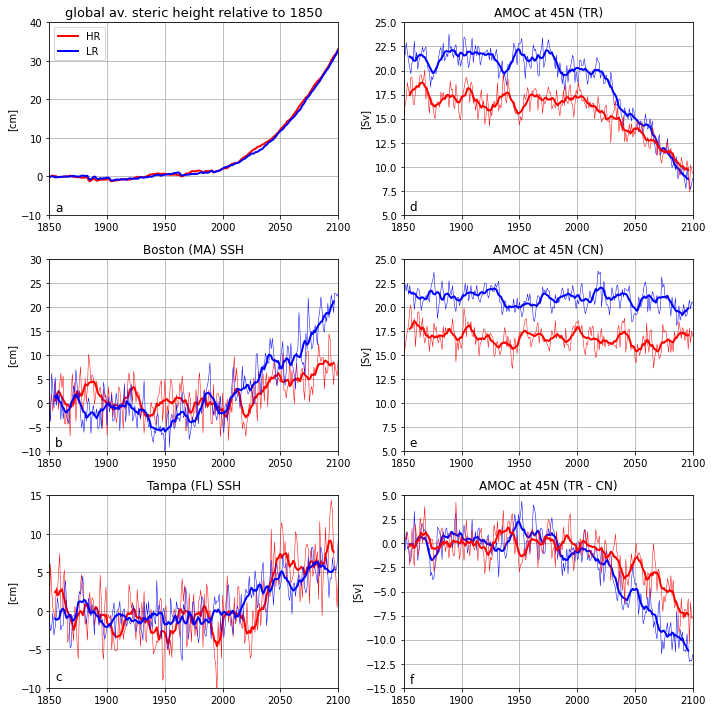

In [28]:
fig1, axs = plt.subplots(3,2,figsize=(10, 10))
# fig, axs = plot.subplots(nrows=3, ncols=2, width='12in', height='10in')

yrs = np.arange(1850,2100+1,1)

# column 1: global av. steric height and SSH
# axs.plot(np.arange(1850,2100+1,1), h_rst_gl_a_fn_TH, color='r', 
#          linewidth=2, label='TR HR')
# axs.plot(np.arange(1850,2100+1,1), h_rst_gl_a_CH, color='r', linestyle='dashed', 
#          linewidth=2, label='CN HR')
axs[0,0].plot(np.arange(1850,2100+1,1), (h_rst_gl_a_fn_TH.values-h_rst_gl_a_CH.values), 
         color='r', linewidth=2, label='HR')
# axs.plot(np.arange(1850,2100+1,1), h_rst_gl_a_intp_TL, color='c', 
#          linewidth=2, label='TR LR')
# axs[0,0].plot(np.arange(1850,2100+1,1), h_rst_gl_a_intp_CL, color='c', 
#          linewidth=2, linestyle='dashed',label='CN LR')
axs[0,0].plot(np.arange(1850,2100+1,1), (h_rst_gl_a_intp_TL-h_rst_gl_a_intp_CL), 
         color='b', linewidth=2, label='LR')
axs[0,0].set_xlim([1850,2100])
axs[0,0].set_ylim([-10,40])
axs[0,0].set_ylabel('[cm]')
axs[0,0].set_title('global av. steric height relative to 1850', fontsize=13)
axs[0,0].grid()
axs[0,0].legend(loc="upper left", frameon=True)
axs[0,0].text(1855, -9, 'a', fontsize=12)

ssh_yrB_THmCH = ssh_yr_TH.isel(nlon_t=0,nlat_t=0) - ssh_yr_CH.isel(nlon_t=0,nlat_t=0) # B: Boston
ssh_yrB_TLmCL = ssh_yr_TL.isel(nlon_t=0,nlat_t=0) - ssh_yr_CL.isel(nlon_t=0,nlat_t=0)
axs[1,0].plot(yrs, ssh_yrB_THmCH, color='r', 
            linewidth=0.5, linestyle='-',label="HR")
axs[1,0].plot(yrs, ssh_yrB_THmCH.rolling(time=10, center=True).mean(), color='r', 
            linewidth=2, linestyle='-',label="HR")
axs[1,0].plot(yrs, ssh_yrB_TLmCL, color='b', 
            linewidth=0.5, linestyle='-',label="LR")
axs[1,0].plot(yrs, ssh_yrB_TLmCL.rolling(time=10, center=True).mean(), color='b', 
            linewidth=2, linestyle='-',label="LR")
axs[1,0].set_xlim([1850,2100])
axs[1,0].set_ylim([-10,30])
axs[1,0].set_ylabel('[cm]')
axs[1,0].set_title('Boston (MA) SSH')
axs[1,0].grid()
axs[1,0].text(1855, -9, 'b', fontsize=12)

ssh_yrT_THmCH = ssh_yr_TH.isel(nlon_t=1,nlat_t=1) - ssh_yr_CH.isel(nlon_t=1,nlat_t=1) # T: Tampa
ssh_yrT_TLmCL = ssh_yr_TL.isel(nlon_t=1,nlat_t=1) - ssh_yr_CL.isel(nlon_t=1,nlat_t=1)
axs[2,0].plot(yrs, ssh_yrT_THmCH, color='r', 
            linewidth=0.5, linestyle='-',label="HR")
axs[2,0].plot(yrs, ssh_yrT_THmCH.rolling(time=10, center=True).mean(), color='r', 
            linewidth=2, linestyle='-',label="HR")
axs[2,0].plot(yrs, ssh_yrT_TLmCL, color='b', 
            linewidth=0.5, linestyle='-',label="LR")
axs[2,0].plot(yrs, ssh_yrT_TLmCL.rolling(time=10, center=True).mean(), color='b', 
            linewidth=2, linestyle='-',label="LR")
axs[2,0].set_xlim([1850,2100])
axs[2,0].set_ylim([-10,15])
axs[2,0].set_ylabel('[cm]')
axs[2,0].set_title('Tampa (FL) SSH')
axs[2,0].grid()
axs[2,0].text(1855, -9, 'c', fontsize=12)

# column 2: AMOC
axs[0,1].plot(yrs, MOC45_yr_TL, color='b', linewidth=0.5, label="TR LR")
axs[0,1].plot(yrs, MOC45_yr_TL.rolling(time=10, center=True).mean(), color='b', linewidth=2, label="TR LR")
axs[0,1].plot(yrs, MOC45_yr_TH, color='r', linewidth=0.5, label="TR HR")
axs[0,1].plot(yrs, MOC45_yr_TH.rolling(time=10, center=True).mean(), color='r', linewidth=2, label="TR HR")
axs[0,1].set_xlim([1850,2100])
axs[0,1].set_ylim([5,25])
axs[0,1].set_ylabel('[Sv]')
axs[0,1].set_title('AMOC at 45N (TR)')
axs[0,1].grid()
axs[0,1].text(1855, 5.5, 'd', fontsize=12)

axs[1,1].plot(yrs, MOC45_yr_CL, color='b', linestyle='-', 
            linewidth=0.5, label="CN LR")
axs[1,1].plot(yrs, MOC45_yr_CL.rolling(time=10, center=True).mean(), color='b', linestyle='-', 
            linewidth=2, label="CN LR")
axs[1,1].plot(yrs, MOC45_yr_CH, color='r', linestyle='-', 
            linewidth=0.5, label="CN HR")
axs[1,1].plot(yrs, MOC45_yr_CH.rolling(time=10, center=True).mean(), color='r', linestyle='-', 
            linewidth=2, label="CN HR")
axs[1,1].set_xlim([1850,2100])
axs[1,1].set_ylim([5,25])
axs[1,1].set_ylabel('[Sv]')
axs[1,1].set_title('AMOC at 45N (CN)')
axs[1,1].grid()
axs[1,1].text(1855, 5.5, 'e', fontsize=12)

MOC45_yr_TLmCL = MOC45_yr_TL - MOC45_yr_CL
MOC45_yr_THmCH = MOC45_yr_TH - MOC45_yr_CH
axs[2,1].plot(yrs, MOC45_yr_TLmCL, 
              color='b', linestyle='-', linewidth=0.5, label="CN LR")
axs[2,1].plot(yrs, MOC45_yr_TLmCL.rolling(time=10, center=True).mean(), 
              color='b', linestyle='-', linewidth=2, label="CN LR")
axs[2,1].plot(yrs, MOC45_yr_THmCH, color='r', linestyle='-', 
            linewidth=0.5, label="CN HR")
axs[2,1].plot(yrs, MOC45_yr_THmCH.rolling(time=10, center=True).mean().values, 
              color='r', linestyle='-', 
            linewidth=2, label="CN HR")
axs[2,1].set_xlim([1850,2100])
axs[2,1].set_ylim([-15,5])
axs[2,1].set_ylabel('[Sv]')
axs[2,1].set_title('AMOC at 45N (TR - CN)')
axs[2,1].grid()
axs[2,1].text(1855, -14.5, 'f', fontsize=12)

fig1.tight_layout()

fig1.savefig(pic1,bbox_inches='tight')

compute regression statistics

In [22]:
# # Boston
# pfB_TH = np.polyfit(MOC45_yr_TH.sel(time=slice('2000','2100')), 
#                     ssh_yr_TH.isel(nlon_t=0, nlat_t=0).sel(time=slice('2000','2100')), deg=1) # pf: polyfit, B: Boston
# pfB_TL = np.polyfit(MOC45_yr_TL.sel(time=slice('2000','2100')), 
#                     ssh_yr_TL.isel(nlon_t=0, nlat_t=0).sel(time=slice('2000','2100')), deg=1)

# print('Boston, SSH2AMOC(TH):', pfB_TH[0])
# print('Boston, SSH2AMOC(TL):', pfB_TL[0])

# # New York
# pfN_TH = np.polyfit(MOC45_yr_TH.sel(time=slice('2000','2100')), 
#                     ssh_yr_TH.isel(nlon_t=1, nlat_t=1).sel(time=slice('2000','2100')), deg=1)# pf: polyfit, N: New York
# pfN_TL = np.polyfit(MOC45_yr_TL.sel(time=slice('2000','2100')), 
#                     ssh_yr_TL.isel(nlon_t=1, nlat_t=1).sel(time=slice('2000','2100')), deg=1)
# print('New York, SSH2AMOC(TH):', pfN_TH[0])
# print('New York, SSH2AMOC(TL):', pfN_TL[0])

Boston, SSH2AMOC(TH): -1.1575294817509472
Boston, SSH2AMOC(TL): -1.732173291130704
New York, SSH2AMOC(TH): -0.9538831050745664
New York, SSH2AMOC(TL): -1.480499361030324


In [23]:
# 1.7/1.2, 1.5/1

(1.4166666666666667, 1.5)

# Appendix

<xarray.DataArray 'MOC' (time: 251)>
array([       nan,        nan,        nan,        nan,        nan,
       21.465704 , 21.340591 , 21.371397 , 21.096916 , 21.00891  ,
       21.04873  , 21.176058 , 21.453896 , 21.561285 , 21.659975 ,
       21.599672 , 21.594584 , 21.4091   , 21.394598 , 21.127113 ,
       20.926096 , 20.669508 , 20.42333  , 20.203775 , 19.951452 ,
       19.752651 , 19.79608  , 19.999819 , 20.240835 , 20.511734 ,
       20.860397 , 21.057102 , 21.178106 , 21.384623 , 21.55699  ,
       21.888762 , 21.987598 , 22.026472 , 21.958586 , 21.99038  ,
       21.940039 , 22.107779 , 22.151659 , 22.026365 , 22.039167 ,
       21.701582 , 21.581964 , 21.482239 , 21.659212 , 21.854877 ,
       21.831228 , 21.685303 , 21.550972 , 21.596098 , 21.659742 ,
       21.959295 , 21.932745 , 21.9718   , 21.885035 , 21.70825  ,
       21.747694 , 21.859287 , 21.885412 , 21.888868 , 21.844263 ,
       21.68221  , 21.783566 , 21.790842 , 21.74317  , 21.770529 ,
       21.627493 , 21.628048 , 21.676262 , 21.754284 , 21.67699  ,
       21.660746 , 21.697468 , 21.628035 , 21.330564 , 21.124674 ,
       21.016928 , 20.88436  , 20.694185 , 20.478624 , 20.288221 ,
       19.969887 , 19.816097 , 19.697271 , 19.875143 , 19.966354 ,
       20.103285 , 20.285465 , 20.619425 , 20.816626 , 20.968237 ,
       21.402102 , 21.613667 , 21.894306 , 22.134542 , 22.215662 ,
...
       20.039991 , 20.094772 , 20.205658 , 20.020336 , 19.90861  ,
       19.804508 , 19.67461  , 19.590567 , 19.690044 , 19.859758 ,
       20.083761 , 20.047789 , 20.027988 , 20.091413 , 19.957352 ,
       19.885294 , 19.918139 , 19.769047 , 19.49354  , 19.220268 ,
       19.128433 , 19.108683 , 18.894947 , 18.554594 , 18.3504   ,
       18.120596 , 17.796974 , 17.606588 , 17.444864 , 17.160715 ,
       16.673079 , 16.188627 , 16.04868  , 15.957354 , 15.856433 ,
       15.707291 , 15.682678 , 15.514964 , 15.288569 , 15.360489 ,
       15.436356 , 15.521209 , 15.409446 , 15.306676 , 15.111785 ,
       15.050219 , 14.92266  , 14.795044 , 14.637858 , 14.471393 ,
       14.446097 , 14.402344 , 14.29086  , 14.269037 , 14.405112 ,
       14.377376 , 14.37213  , 14.2261505, 14.150469 , 13.8455   ,
       13.421599 , 13.239203 , 13.183316 , 12.874977 , 12.539259 ,
       12.324936 , 11.989116 , 11.866236 , 11.793258 , 11.948998 ,
       11.94803  , 11.824878 , 11.573918 , 11.451637 , 11.307197 ,
       11.168439 , 10.995036 , 10.961757 , 10.669341 , 10.292371 ,
       10.137023 ,  9.9194565,  9.850417 ,  9.765176 ,  9.594551 ,
        9.316627 ,  9.33224  ,  9.109698 ,  9.077841 ,  8.922771 ,
        8.784421 ,  8.734004 ,        nan,        nan,        nan,
              nan], dtype=float32)
Coordinates:
  * time          (time) object 1850-12-31 00:00:00 ... 2100-12-31 00:00:00
    lat_aux_grid  float32 44.76
    moc_z         float32 1.041e+05

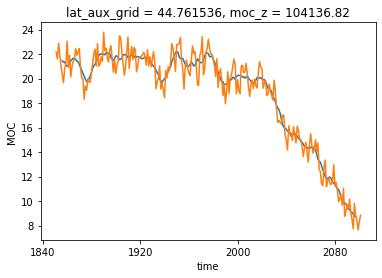

In [31]:
# MOC45_yr_TL.rolling(time=20, center=True).mean().dropna("time")#.plot()
MOC45_yr_TL.rolling(time=10, center=True).mean().dropna("time").plot()
MOC45_yr_TL#.plot()
MOC45_yr_TL.plot()
MOC45_yr_TL.rolling(time=10, center=True).mean()#.dropna('time').time

plot original SSH 

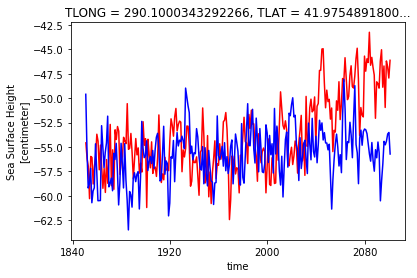

In [23]:
ssh_yr_TH.isel(nlon_t=0,nlat_t=0).plot(color='r')
ssh_yr_CH.isel(nlon_t=0,nlat_t=0).plot(color='b')

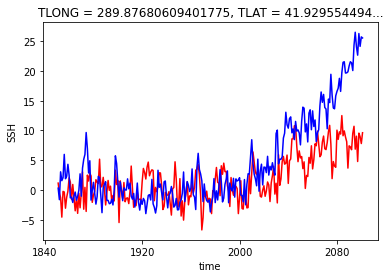

In [24]:
(ssh_yr_TH.isel(nlon_t=0,nlat_t=0) - 
 ssh_yr_TH.isel(nlon_t=0,nlat_t=0).sel(time=slice('1850','1950')).mean('time')).plot(color='r')
(ssh_yr_TL.isel(nlon_t=0,nlat_t=0) - 
ssh_yr_TL.isel(nlon_t=0,nlat_t=0).sel(time=slice('1850','1950')).mean('time')).plot(color='b')

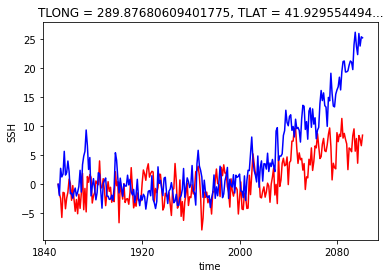

In [25]:
(ssh_yr_TH.isel(nlon_t=0,nlat_t=0) - 
 ssh_yr_TH.isel(nlon_t=0,nlat_t=0).isel(time=0)).plot(color='r')
(ssh_yr_TL.isel(nlon_t=0,nlat_t=0) - 
ssh_yr_TL.isel(nlon_t=0,nlat_t=0).isel(time=0)).plot(color='b')

check MOC coordinates 

In [26]:
ds_MOC_TH.MOC

<xarray.DataArray 'MOC' (time: 3012, transport_reg: 2, moc_comp: 1, moc_z: 63, lat_aux_grid: 395)>
[149907240 values with dtype=float32]
Coordinates:
  * time               (time) object 1850-01-31 00:00:00 ... 2100-12-31 00:00:00
    transport_regions  (transport_reg) |S256 b'Global Ocean - Marginal Seas' ...
    moc_components     (moc_comp) |S256 b'Eulerian Mean'
  * moc_z              (moc_z) float32 0.0 1e+03 2e+03 ... 5.75e+05 6e+05
  * lat_aux_grid       (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
Dimensions without coordinates: transport_reg, moc_comp
Attributes:
    units:      Sverdrups
    long_name:  Meridional Overturning Circulation

In [27]:
ds_MOC_TH.MOC.sel(lat_aux_grid=45, moc_z=1000*100,
             method='nearest').sel(moc_comp=0, transport_reg=1)

<xarray.DataArray 'MOC' (time: 3012)>
array([11.917703, 15.644326, 16.27959 , ...,  9.647427, 11.984182,  8.552816],
      dtype=float32)
Coordinates:
  * time               (time) object 1850-01-31 00:00:00 ... 2100-12-31 00:00:00
    transport_regions  |S256 b'Atlantic Ocean + Mediterranean Sea + Labrador ...
    moc_components     |S256 b'Eulerian Mean'
    moc_z              float32 1.041e+05
    lat_aux_grid       float32 44.76
Attributes:
    units:      Sverdrups
    long_name:  Meridional Overturning Circulation